# Fitted (cross-) semivariograms and (cross-) covariograms in summer of different years

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../src")

In [2]:
import numpy as np
import xarray as xr

import fields
import model
import plot

%matplotlib inline

## Read data and setup analysis

In [3]:
ds = xr.open_dataset("../data/exp_pro/OCO2_MODIS_4x5deg_monthly_conus_augmented.nc")
ds = ds.where(ds.time.dt.year > 2014, drop=True)

# Format as multi-fields
ds_xco2 = ds[["xco2", "xco2_var"]]
ds_sif = ds[["sif", "sif_var", "evi"]]

In [4]:
# Analysis variables
datasets = [ds_xco2, ds_sif]
covariates = [["lon", "lat"], ["evi"]]
timedeltas = [0, -1]
vario_config = fields.VarioConfig(max_dist = 1500, n_bins = 30)

In [7]:
def analyze_timestamp(timestamp):
    # Initialize model
    mod = model.FullBivariateMatern()

    # Setup multi-field object
    mf = fields.MultiField(
        datasets, covariates, timestamp, timedeltas
    )
    plot.plot_fields(mf)

    # Compute empirical variograms, then fit model
    gamma = mf.empirical_variograms(vario_config)
    mod.fit(gamma)
    plot.plot_variograms(mod.fit_result, ["XCO$_2$", "SIF"])

def analyze_month(month: int):
    """Run `analyze_timestamp` for the given month in 2016, 2018, and 2020"""
    timestamps = [f"{y}-0{month}-01" for y in [2015, 2016, 2018, 2019, 2020]]
    for timestamp in timestamps:
        print(f"Month: {timestamp}")
        analyze_timestamp(np.datetime64(timestamp))


## July
---

Month: 2015-07-01
Month: 2016-07-01
Month: 2018-07-01
Month: 2019-07-01
Month: 2020-07-01


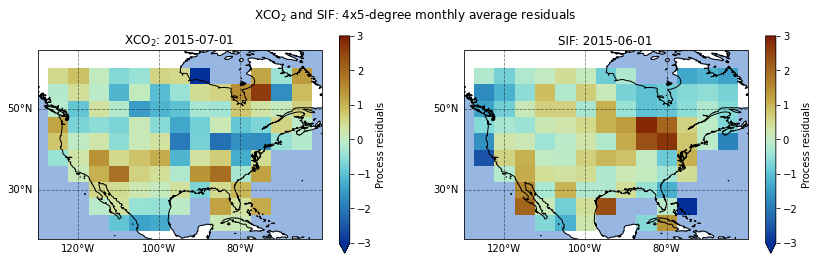

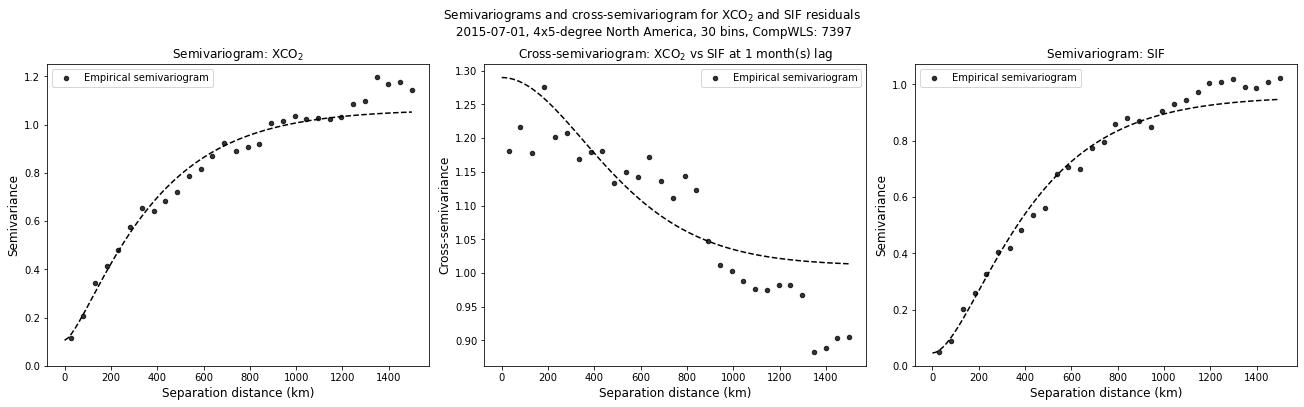

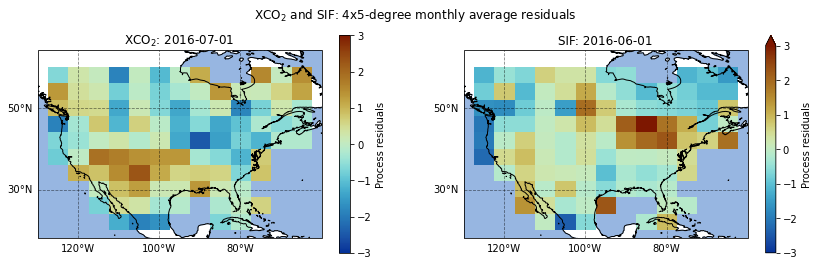

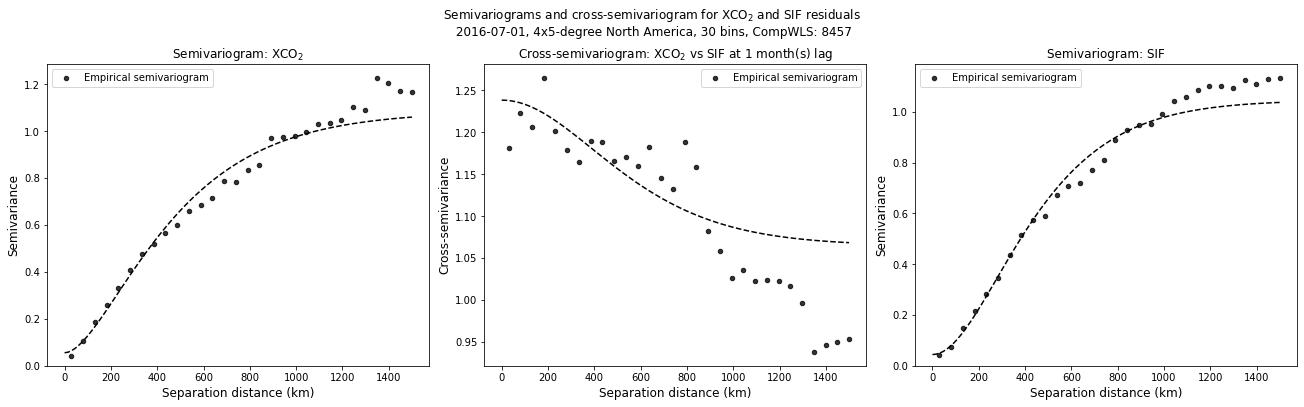

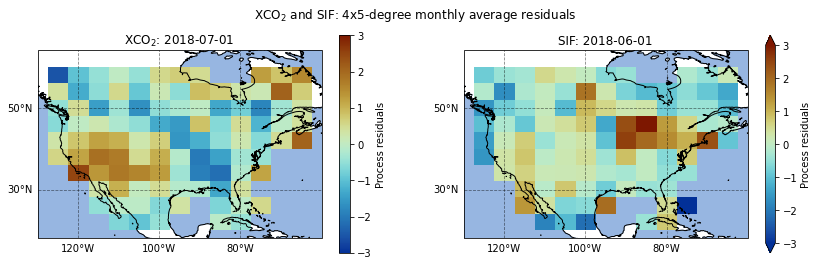

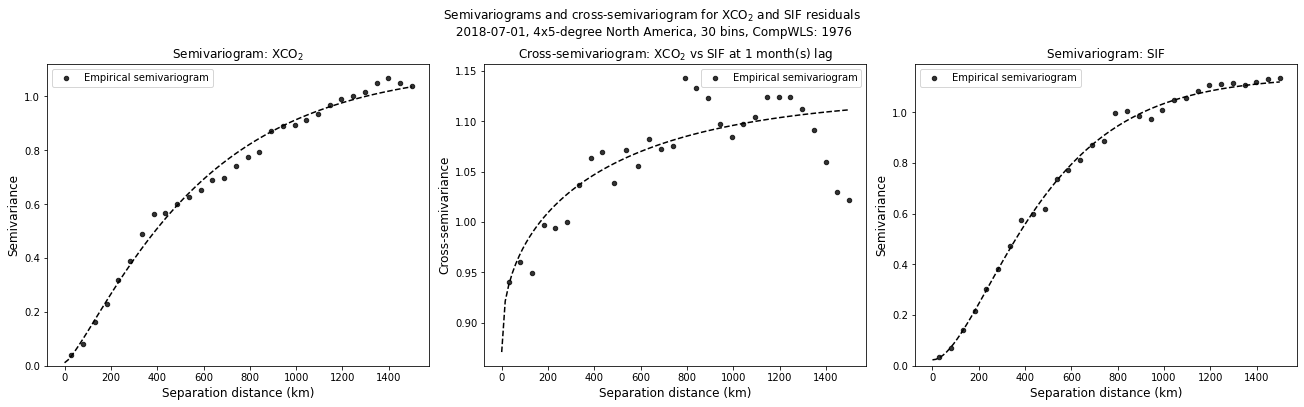

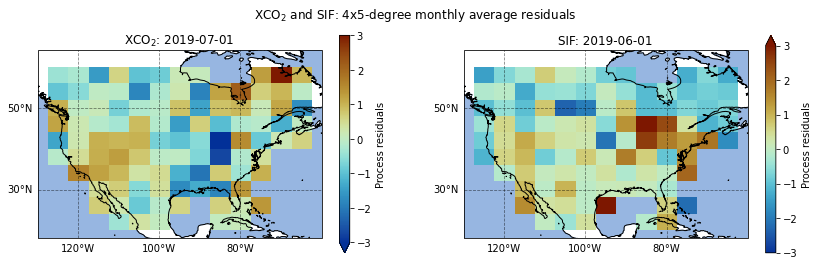

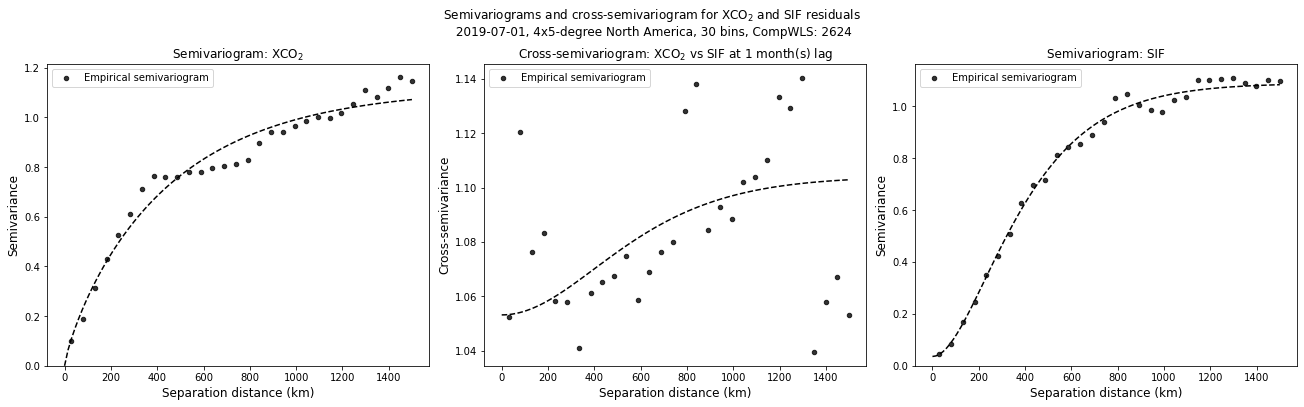

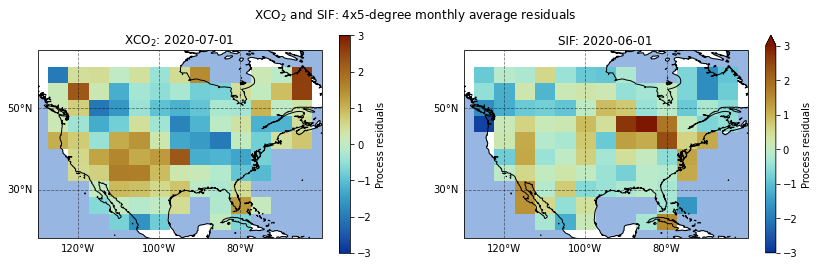

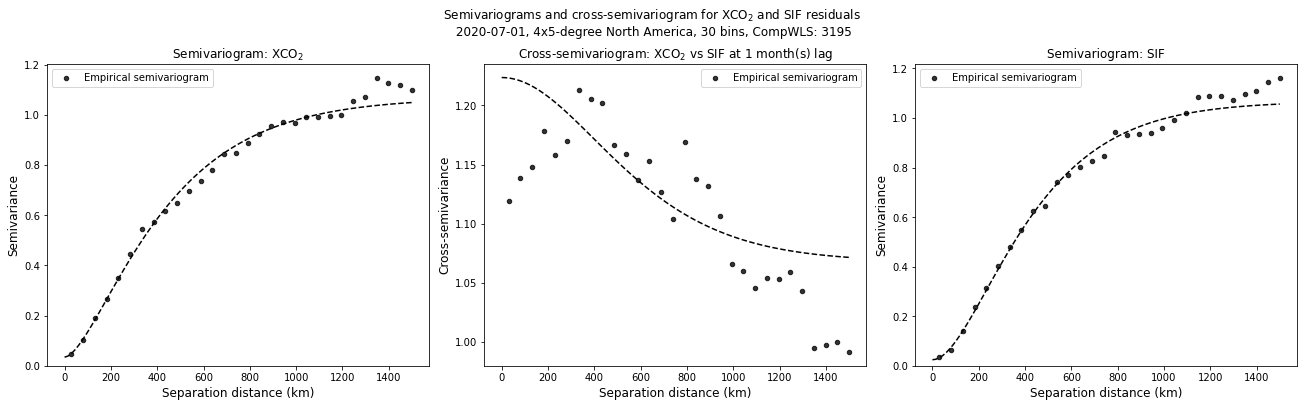

In [8]:
analyze_month(7)

## August
---

Month: 2015-08-01
Month: 2016-08-01
Month: 2018-08-01
Month: 2019-08-01
Month: 2020-08-01


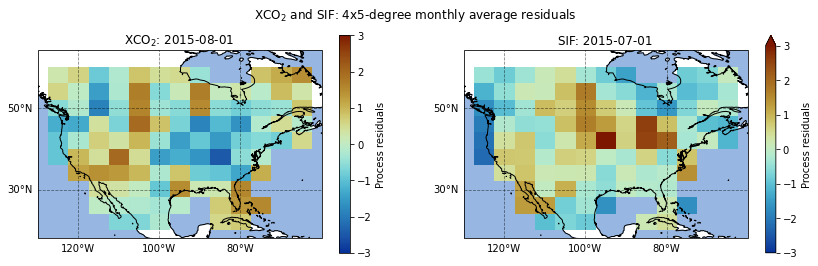

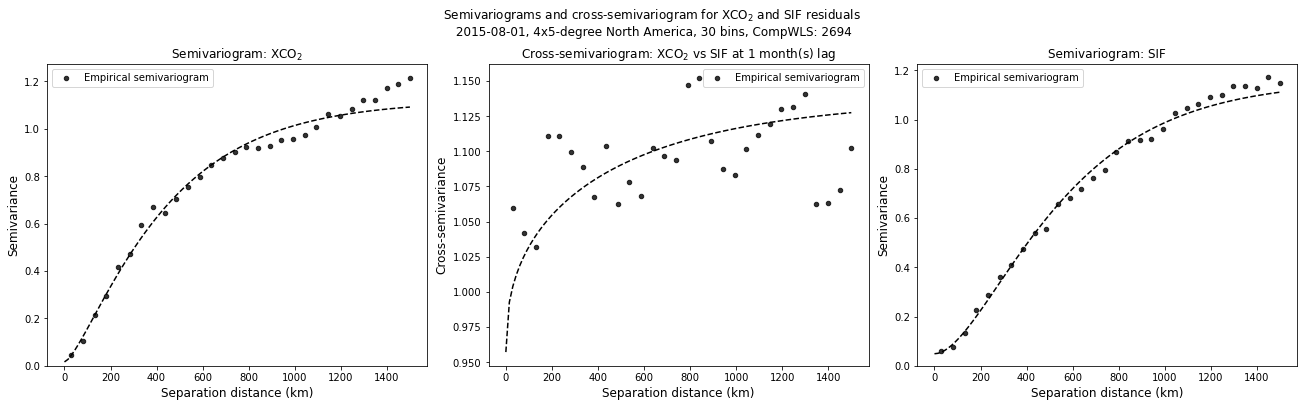

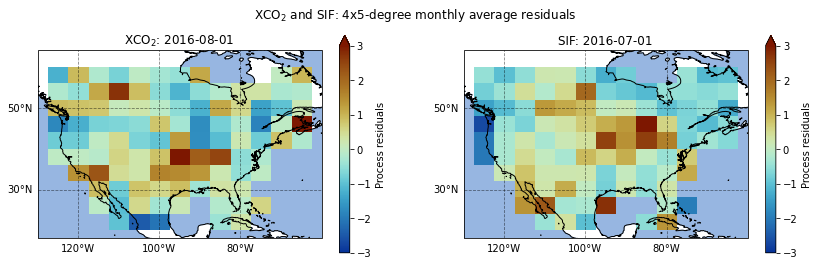

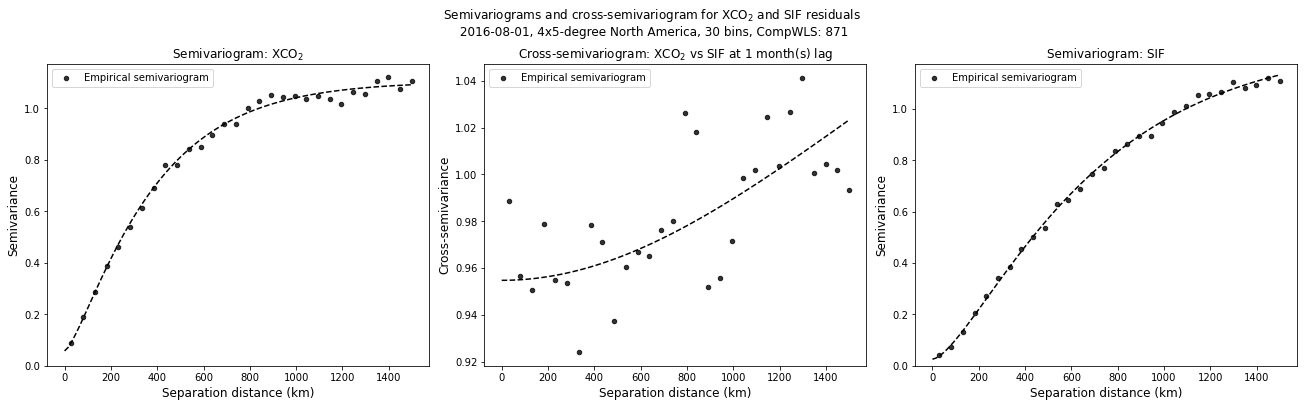

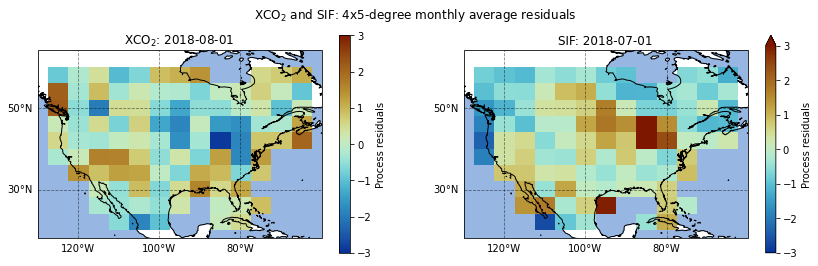

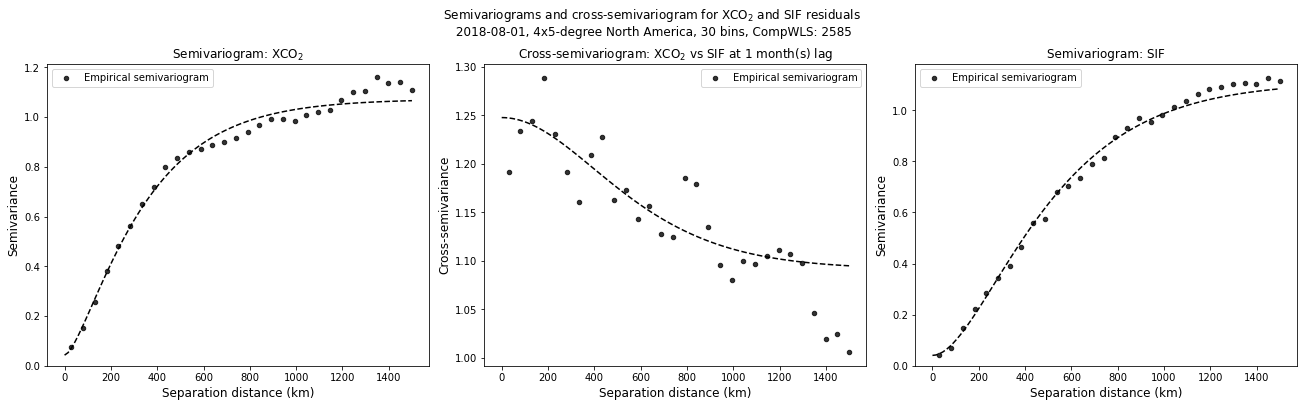

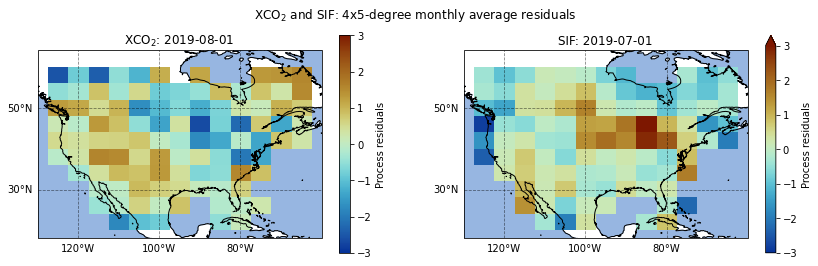

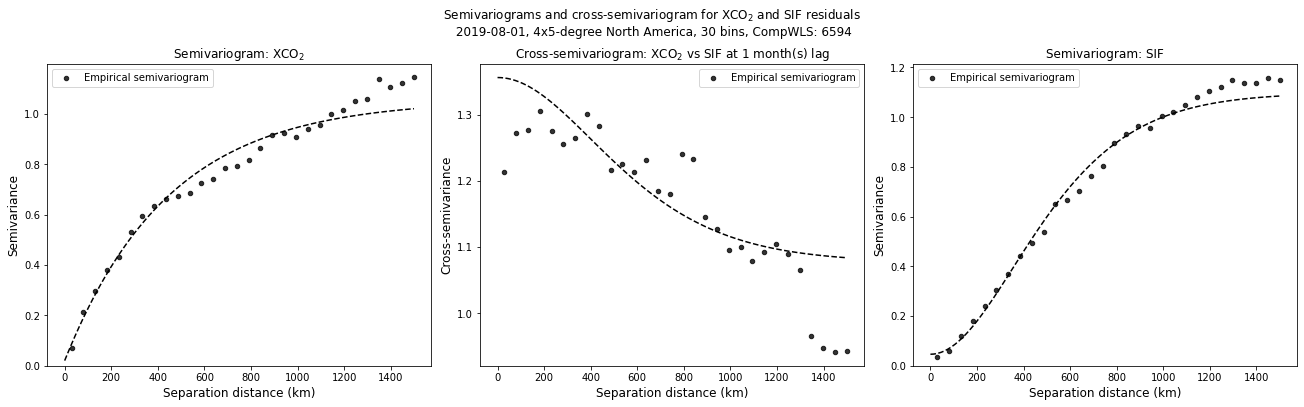

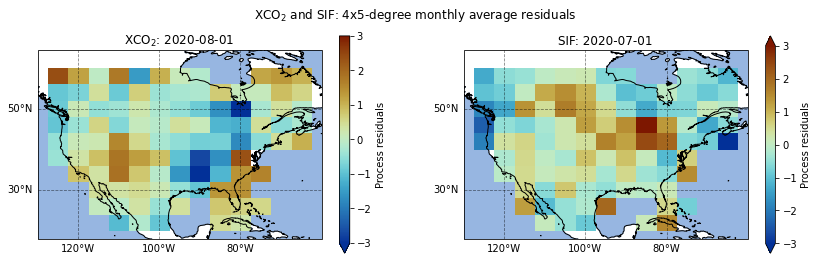

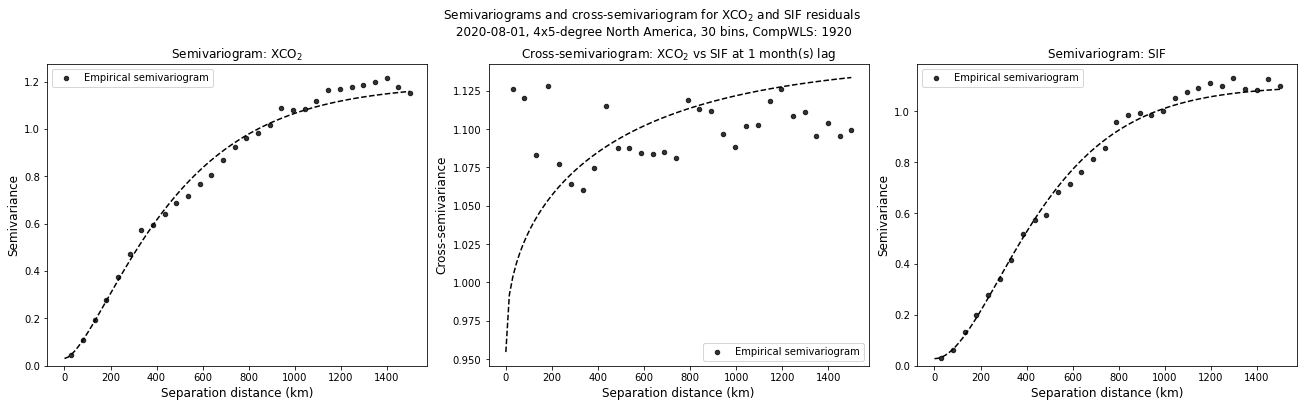

In [9]:
analyze_month(8)

## September
---

Month: 2015-09-01
Month: 2016-09-01
Month: 2018-09-01
Month: 2019-09-01
Month: 2020-09-01


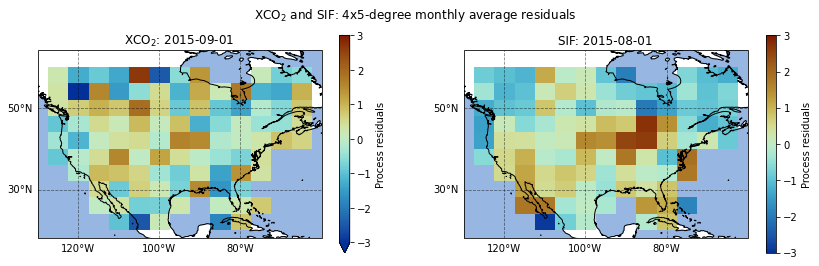

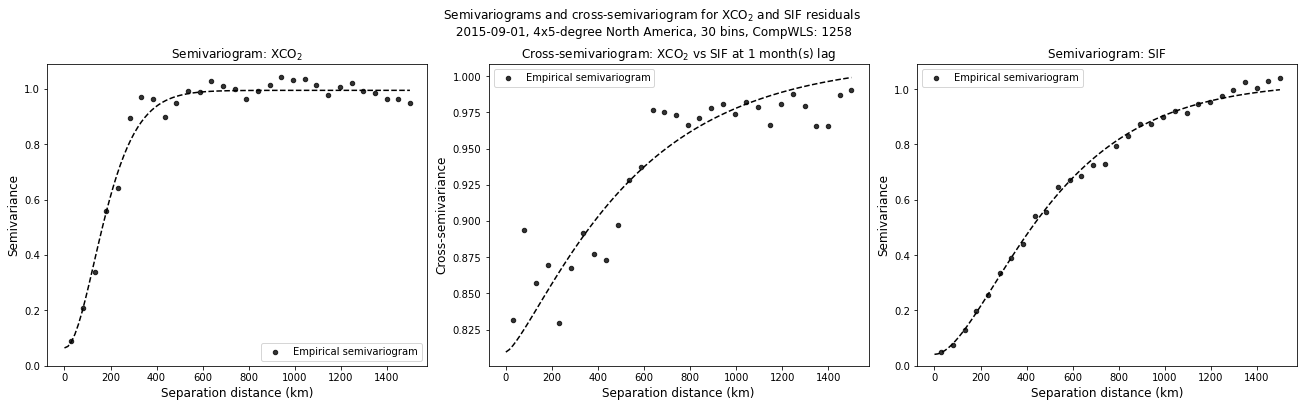

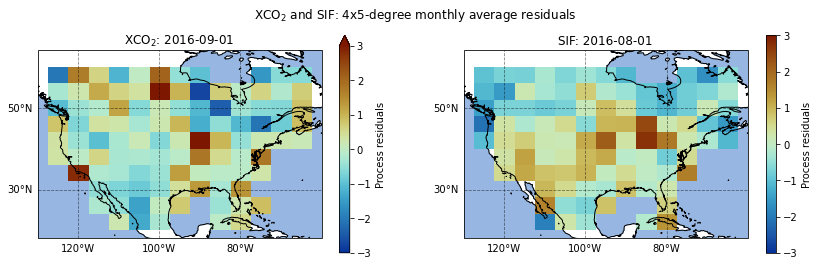

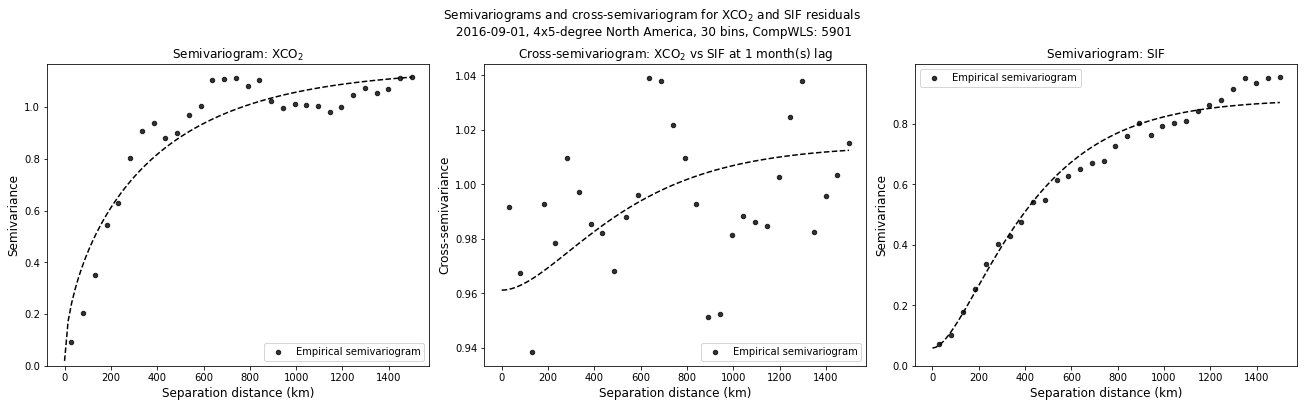

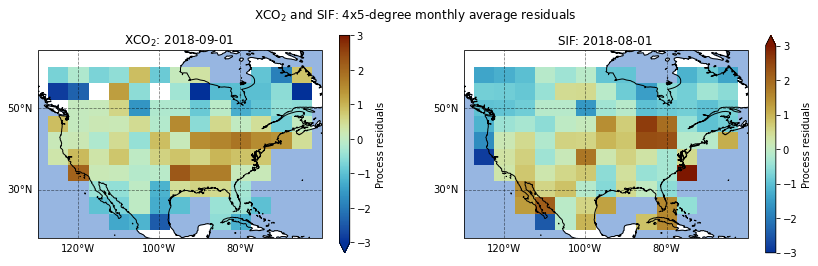

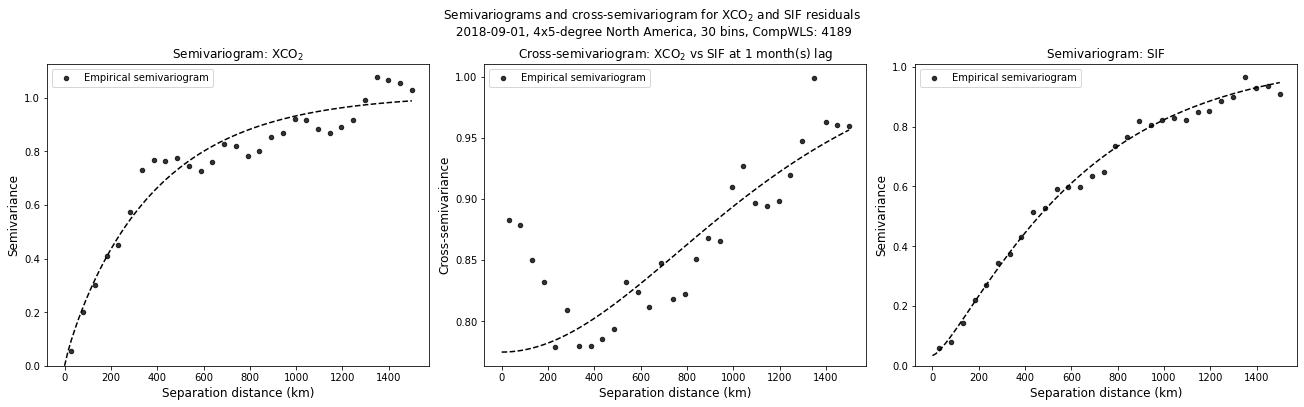

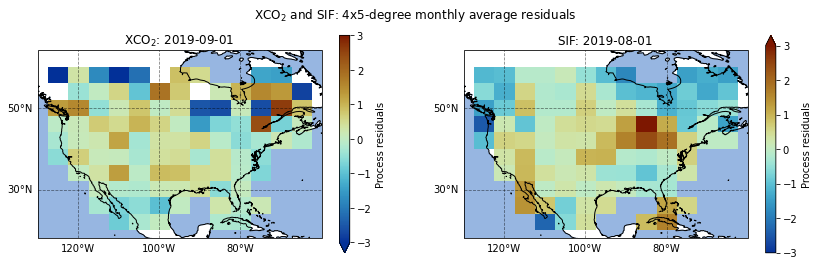

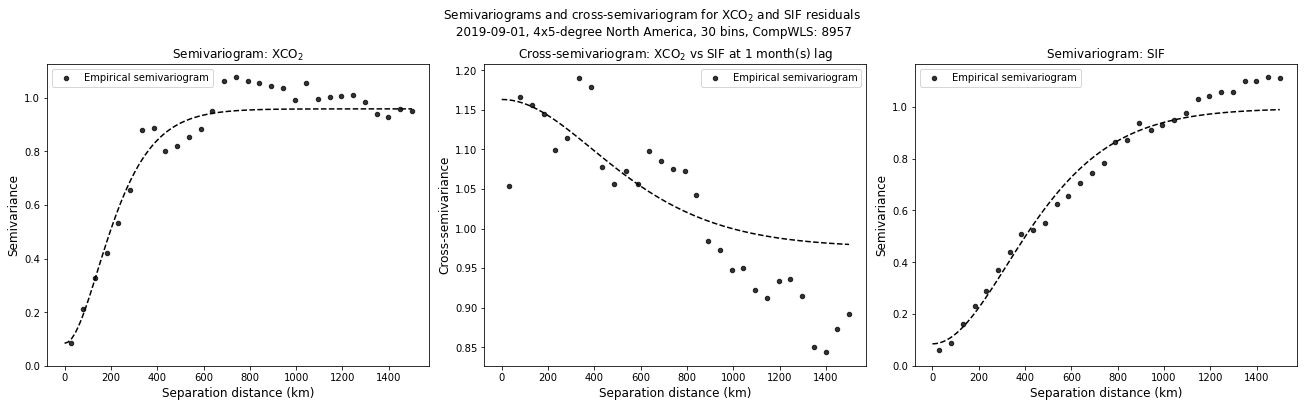

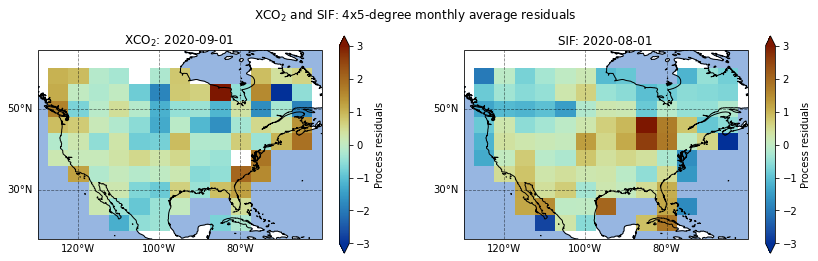

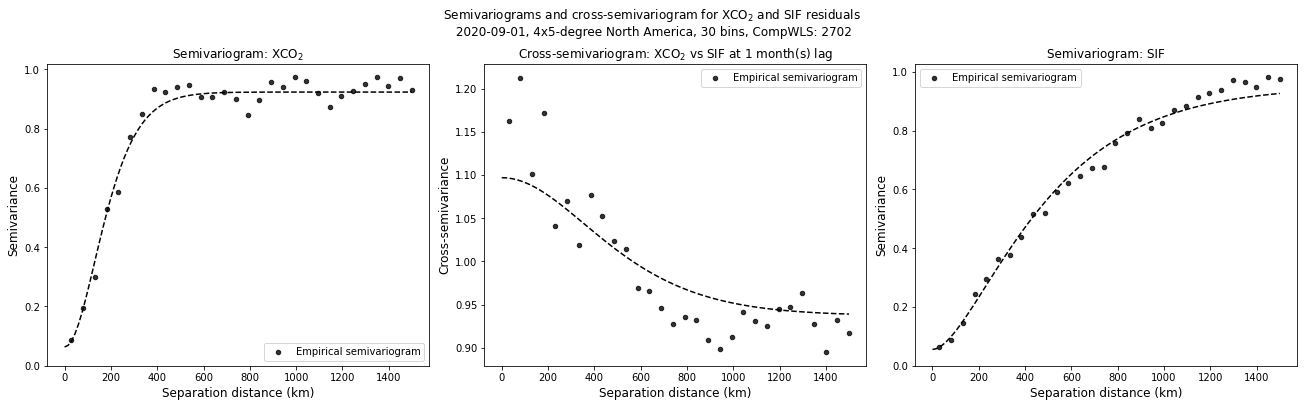

In [10]:
analyze_month(9)